<a href="https://colab.research.google.com/github/esmu26/Parliament-Topic-Classification/blob/main/Parliament_proceedings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Understanding

## 1.1 Background


*In the UK parliment(National Assembly), responses to debates and proceedings cover a broad range of topics, reflecting the various funtions parliament, which include legislation,oversight, and representation.*

*parliamentary debates are critical forums for discussing national issues, shaping policies, and making government decisions. The proceedings often generate vast amounts of unstructured text data. Manually categorizing these debates into specific topics is time-consuming and prone to human bias.*

*Automating this classification can:*

*- Help journalists quickly find relevant content.*

*- Assist political analysts in identfying trends over time.*

*- Improve public accessibility and transparency in governance.*


## 1.2 Business Objective
*The primary goal is to **develop an NLP-based classification system** that automatically assigns topics to reponses in parliamentary debates and proceedings.*

*This will:*

*- **Reduce time** required for manually for classification.*

*- **Increase accuracy** in topic labeling.*

*- Enable **faster policy trend analysis**.*


## 1.3 Problem Statement
*Parliamentary debate transcripts contains discussions on diverse topics such as healthcare, education, economy, environment, and security. currently, categorizing these reponses manually is resource-intensive. This project aims to apply **Natural Language Processing and Machine Learning** techniques to automatically classify debates responses into predefined topics, thereby improving accessibility, transparency, and efficiency in parliamentary data analysis.*

## 1.4 Project Scope
**In-Scope:**

*- Collecting and preprocessing parliamentary debate datasets.*

*- Extracting relevant features from textual data.*

*- Applying machine learning classification algorithms.*

*- Evaluating model performance using accuracy , precision, recall, and F1-score.*

**Out-of-Scope**

*- Sentiment analysis of responses.*

*- Live real-time scraping (dataset will be static for this project).*

*- multilingual processing (only English will be used unless otherwise specified ).*

## 1.5 Success Criteria
*The project will be considered successful if:*

*1. The classification model achieves **>= 80% accuracy**(or equivalent F1-score).*

*2. The trained model can correctly classify **unseen parliamentary responses** into their relevant topics.*

*3. The process is well-documented for reproducibility.*

## 1.6 Stakeholders
*- **Researchers/ Analysts** - Need topic summaries for policy studies.*

*- **Journalists** - want quick access to debates on specific issues.*

*- **Parliament Staffs** - Require efficient records organization.*

*- **Public** - Desire transparency and easier navigation of proceedings.*

## 1.7 Constraints and Risks
*- Limited availability of labeled parliamentary datasets.*

*- Potential class imbalance (some topics may have fewer examples).*

*- Variation in speaking styles and vocabulary among members.*

## 1.8 Assumptions
*- Debate transcripts are in **English**.*

*- Topic labels will be **predefined** and mutually exclusive.*

*- Historical data will be representative of future debate reponses.*

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn nltk


In [2]:
import pandas as  pd
import numpy as np


data = {
    "response": [
        "The healthcare budget will be increased to imperove hospital facilities.",
        "We are allocating more funds to improve education infrastructure.",
        "The economy is showing signs of recovery due to tax reforms.",
        "Security measures at the borders will be strengthed .",
        "We wil invest in new technologies to enhance our economy.",
    ],
    "topic": ["Healthcare", "Education", "Economy", "Security", "Technology"],
}
df = pd.DataFrame(data)
print(df)


                                            response       topic
0  The healthcare budget will be increased to imp...  Healthcare
1  We are allocating more funds to improve educat...   Education
2  The economy is showing signs of recovery due t...     Economy
3  Security measures at the borders will be stren...    Security
4  We wil invest in new technologies to enhance o...  Technology


In [3]:
df.to_csv("parliament_placeholder.csv", index=False)
print("placeholder dataset saved as parliament_placeholder.csv")

placeholder dataset saved as parliament_placeholder.csv


## Data Understanding
# Data Collection
**-Speeches/Statements**: *Responses given by Members of Parliaments(MPs).

**-Meta-data**: *such as date ,session ID,speaker, party affiliation*

**-Topic Labels**: *Each response may be labeled or can be labeled with categories such as Economy, Education, Health , Governance, Foreign policy ,etc.*

#source of Data
-open data repositories( Kaggle ).

##Data Exploration
*Before preprocessing ,we will explore the dataset to understand its properties:*

**- Number of records(rowS)** *- eg., 50,000 speeches.*

**-Number of unique topics** *-e.g.,Economy, Health, Education, Foreign exchange, Agriculture, etc.

**-Text Length distribution** *-Some responses may be very short(1-2 sentences), while others are long speeches.*

## Data Quality Issues

*Some possible issues to expect:*

**-Imbalance** *in topic categories (some topics appear far more than others).*

**-Noisy text** *-includes filters,greetings, or irrelevant content("Thank you Mr. Speaker..").*

**-Spelling errors/abbreviation** *in debates.*

**-Missing data** *-some speeches may not have labeled topics.*

**-Duplicate Speeches** *-needs to check for repetition.*

   ## SUMMARY

   *The dataset is parliamentary debate transcripts labeled with topics. We wili explore distributions, checks for imbalance, and clean the text before modeling. This phase provides the foundation for Data preparation and Modeling.*





In [4]:
from google.colab import files
uploaded = files.upload()

Saving UK Parliament and Proceedings.csv to UK Parliament and Proceedings.csv


In [6]:
for filename in uploaded.keys():
  print(f"Uploaded file: {filename}")

Uploaded file: UK Parliament and Proceedings.csv


In [8]:
import pandas as pd
file_path = '/content/drive/MyDrive/UK Parliament and Proceedings.csv'


In [18]:
display(df.head())

,prompt_agenda,prompt_speaker,prompt,prompt_terms,response,response_terms
0,Class Sizes [Oral Answers To Questions > Educa...,David Blunkett,I am always willing to learn from successful p...,100,"Yet again, the Government are changing their l...",78
1,National Child Care Strategy [Oral Answers To ...,David Blunkett,There are some interesting experiments in care...,79,Whatever the Secretary of State claims in his ...,124
2,NaN,Estelle Morris,I add my thanks to those that my hon. Friend h...,124,I listened very carefully to the Minister's an...,181
3,Teachers' Pay [Oral Answers To Questions > Edu...,David Blunkett,"On the hon. Gentleman's first point, it is dif...",105,One reason why many teachers are worried about...,108
4,Teachers' Pay [Oral Answers To Questions > Edu...,David Blunkett,I am very pleased that it is Maths Year 2000. ...,120,I am sorry that the Secretary of State did not...,177


In [19]:
display(df.head())

,prompt_agenda,prompt_speaker,prompt,prompt_terms,response,response_terms
0,Class Sizes [Oral Answers To Questions > Educa...,David Blunkett,I am always willing to learn from successful p...,100,"Yet again, the Government are changing their l...",78
1,National Child Care Strategy [Oral Answers To ...,David Blunkett,There are some interesting experiments in care...,79,Whatever the Secretary of State claims in his ...,124
2,NaN,Estelle Morris,I add my thanks to those that my hon. Friend h...,124,I listened very carefully to the Minister's an...,181
3,Teachers' Pay [Oral Answers To Questions > Edu...,David Blunkett,"On the hon. Gentleman's first point, it is dif...",105,One reason why many teachers are worried about...,108
4,Teachers' Pay [Oral Answers To Questions > Edu...,David Blunkett,I am very pleased that it is Maths Year 2000. ...,120,I am sorry that the Secretary of State did not...,177


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12225 entries, 0 to 12224
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   prompt_agenda   12224 non-null  object
 1   prompt_speaker  12225 non-null  object
 2   prompt          12225 non-null  object
 3   prompt_terms    12225 non-null  int64 
 4   response        12225 non-null  object
 5   response_terms  12225 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 573.2+ KB


In [21]:
display(df.describe())

,prompt_terms,response_terms
count,12225.000000,12225.000000
mean,92.580613,119.923926
std,126.032254,141.006376
min,1.000000,1.000000
25%,50.000000,59.000000
50%,72.000000,88.000000
75%,99.000000,126.000000
max,2686.000000,2325.000000


In [22]:
display(df['prompt_agenda'].value_counts())

,count
prompt_agenda,
Engagements [Oral Answers to Questions > Prime Minister],2745
European Council,805
Leaving the EU,519
Engagements [Oral Answers to Questions > Oral Answers to Questions > Prime Minister > Prime Minister],327
Topical Questions [Oral Answers to Questions > Home Department],318
...,...
Heathrow (Third Runway),1
Domestic Violence [Oral Answers to Questions > Women and Equality > Written Answers to Questions > Women and Equality],1
Financial Statement,1


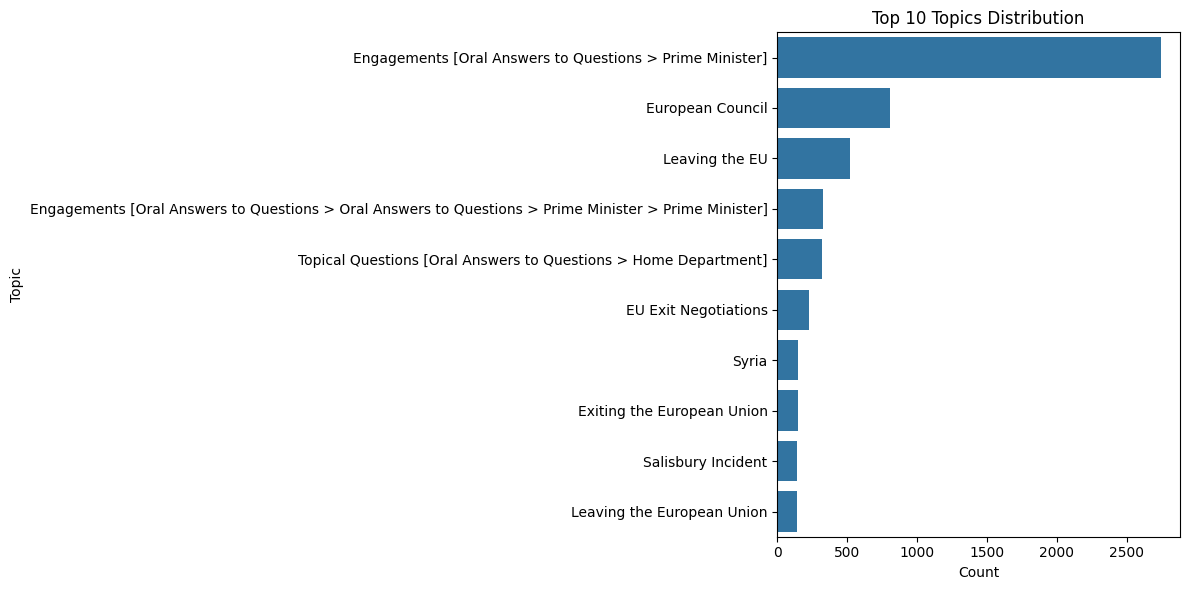

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='prompt_agenda', order=df['prompt_agenda'].value_counts().index[:10])
plt.title('Top 10 Topics Distribution')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.tight_layout()
plt.show()

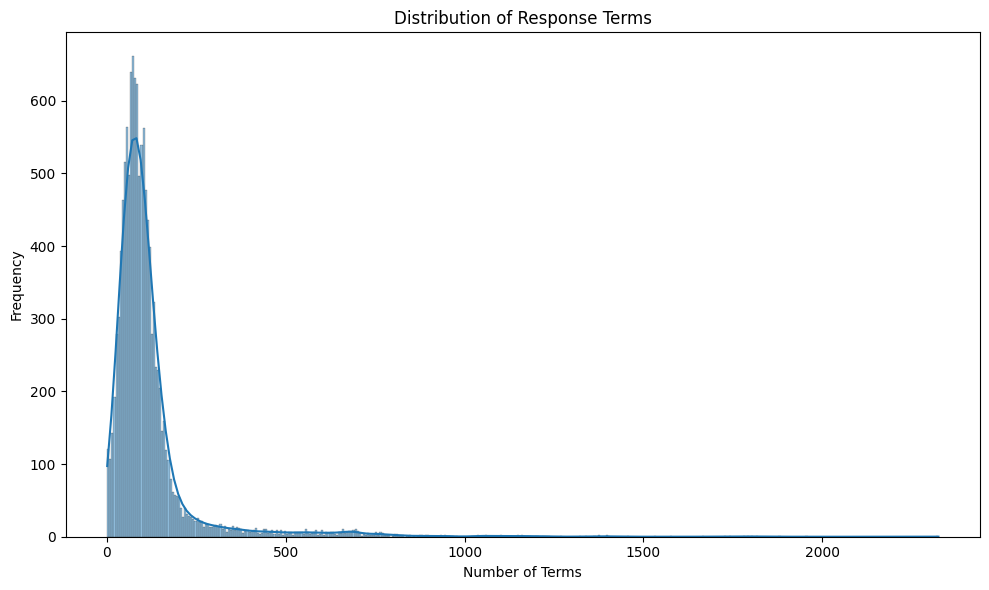

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='response_terms', kde=True)
plt.title('Distribution of Response Terms')
plt.xlabel('Number of Terms')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Our Findings
*We successfully loaded a CSV file containing parliamentary debate transcripts into a pandas DataFrame.*
*The dataset includes information on the debate's agenda, the speaker,and the terms used.*

*Through our initial checks, we have identified the following columns in the DataFrame:*
**1. Prompt_agenda**

**2. Prompt_speaker**

**3. Prompt_terms**

**4. Response**

*This **data understanding** serves as the foundation for further analysis,including data cleaning, exxploration of topic distributions, and text preparation for modeling.*